## Research Problem

As a football analyst you have been tasked to create a model to predict the result of a game between team 1 and 2 based on who is home and who's away, and whether or not the game is friendly for Mchezopesa Ltd.

In [ ]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

Importing our datasets

In [ ]:
## import our datas
df_ranking=pd.read_csv('/content/fifa_ranking.csv')
df_result=pd.read_csv('/content/results.csv')

In [ ]:
df_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [ ]:
df_result

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [ ]:
#Checking shape of dataframe
print("Ranking dataframe shape is ", str(df_ranking.shape))
print("Result dataframe shape is ", str(df_result.shape))

Ranking dataframe shape is  (57793, 16)
Result dataframe shape is  (40839, 9)


In [ ]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Data Cleaning

Ranking started in the year 1993, from results table we have years below that.

In [ ]:
df_result['date'].unique().tolist()
df_result.date = pd.to_datetime(df_result.date)

In [ ]:
df_result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

### Dropping dates earlier than 1993

In [ ]:
df_result = df_result.drop(df_result[(df_result.date < '1993-08-08')].index)

In [ ]:
df_result.shape

(22924, 9)

### cleaning dataset

In [ ]:
#checking columns in result dataframe
df_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
df_ranking.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [ ]:
#checking columns in result dataframe
df_result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
df_result.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [ ]:
df_result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [ ]:
#separate date column to month and year
df_result['month'] = df_result.date.dt.month
df_result['year'] = df_result.date.dt.year

In [ ]:
df_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,1993


In [ ]:
df_ranking.rank_date = pd.to_datetime(df_ranking.rank_date)

In [ ]:
#separate date column to month and year
df_ranking['month'] = df_ranking.rank_date.dt.month
df_ranking['year'] = df_ranking.rank_date.dt.year

In [ ]:
df_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [ ]:
#merged data of home teams dataframe
home_team =  pd.merge(df_result,df_ranking, how= 'left', left_on= ['year','month','home_team'], right_on=['year','month','country_full'])
#rename the rank to hometeam_rank
home_team.rename(columns={'rank':'hometeam_rank'},inplace=True)
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,hometeam_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,1993,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,1993,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,1993,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,1993,67.0,Paraguay,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
home_team.shape

(22993, 27)

In [ ]:
#Merged data of away teams dataframe
away_team = pd.merge(df_result,df_ranking,how='left',left_on=['year','month','away_team'],right_on=['year','month','country_full'])
#rename the rank to awayteam_rank
away_team.rename(columns={'rank':'awayteam_rank'},inplace=True)
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,awayteam_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,1993,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,1993,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,1993,94.0,Venezuela,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,86.0,Sierra Leone,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,1993,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
away_team.shape

(23000, 27)

In [ ]:
#Merging the hometeam with away team
teams = pd.merge(home_team,away_team,how='left',left_on=['year','month','home_team','away_team'],right_on=['year','month','home_team','away_team'])
teams.head()

,date_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,month,year,hometeam_rank,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,awayteam_rank,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,1993,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,1993,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,1,1,Friendly,Maceió,Brazil,False,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,1993,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94.0,Venezuela,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-08,1,0,Friendly,Conakry,Guinea,False,86.0,Sierra Leone,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-09,4,0,Friendly,Conakry,Guinea,False,86.0,Sierra Leone,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [ ]:
teams.columns

Index(['date_x', 'home_team', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'city_x', 'country_x', 'neutral_x', 'month', 'year',
       'hometeam_rank', 'country_full_x', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'city_y', 'country_y',
       'neutral_y', 'awayteam_rank', 'country_full_y', 'country_abrv_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank

In [ ]:
#to remove unwanted columns, col_drop variable will hold the necessary columns to drop
col_drop = ['date_x', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'city_y', 'country_y',
       'neutral_y', 
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y']

teams.drop(col_drop,axis=1,inplace=True)

In [ ]:
teams.shape

(24064, 12)

In [ ]:
teams.isnull().sum()

home_team           0
away_team           0
home_score_x        0
away_score_x        0
tournament_x        0
city_x              0
country_x           0
neutral_x           0
month               0
year                0
hometeam_rank    4543
awayteam_rank    4651
dtype: int64

In [ ]:
#create a copy for the dataframe
df = teams.copy()

In [ ]:
df.dropna(inplace = True)
df.head()

,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,month,year,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,1993,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,1993,8.0,14.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,1993,35.0,94.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,86.0
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,86.0


In [ ]:
#renaming columns
df.rename(columns = {'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament', 'city_x': 'city', 'country_x': 'country',\
                        'neutral_x': 'neutral'}, inplace = True)
df.head()


,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,1993,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,1993,8.0,14.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,1993,35.0,94.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,86.0
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,1993,65.0,86.0


In [ ]:
df.describe()

,home_score,away_score,month,year,hometeam_rank,awayteam_rank
count,17666.000000,17666.000000,17666.000000,17666.000000,17666.000000,17666.000000
mean,1.606872,1.060455,6.855825,2006.384807,76.958168,80.142024
std,1.614376,1.234641,3.289536,6.802832,50.788745,52.275702
min,0.000000,0.000000,1.000000,1993.000000,1.000000,1.000000
25%,0.000000,0.000000,4.000000,2001.000000,34.000000,36.000000
50%,1.000000,1.000000,7.000000,2007.000000,72.000000,74.000000
75%,2.000000,2.000000,10.000000,2012.000000,112.000000,117.000000
max,31.000000,15.000000,12.000000,2018.000000,209.000000,209.000000


# Exploratory Data Analysis

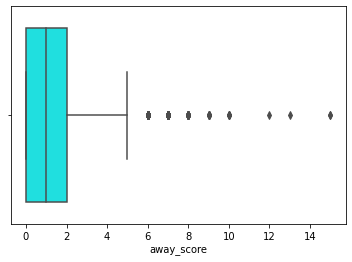

In [ ]:
sns.boxplot(df['away_score'],color='cyan')
plt.show()

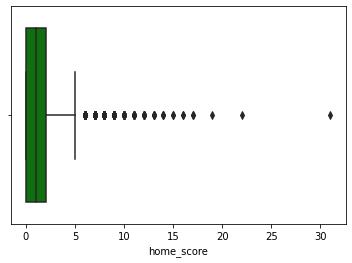

In [ ]:
sns.boxplot(df['home_score'],color='g')
plt.show()

presence of outliers

In [ ]:
#Taking care of outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

df = df[~((df < (q1-1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(13110, 12)

Measure of Central Tendencies

In [ ]:
df.median()

home_score          1.0
away_score          1.0
neutral             0.0
month               8.0
year             2007.0
hometeam_rank      71.0
awayteam_rank      72.0
dtype: float64

In [ ]:
df.mean()

home_score          1.497330
away_score          0.976049
neutral             0.000000
month               7.028223
year             2006.227155
hometeam_rank      76.092067
awayteam_rank      77.511823
dtype: float64

In [ ]:
df.mode()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,hometeam_rank,awayteam_rank
0,Oman,Zambia,1.0,0.0,Friendly,Muscat,Oman,False,10.0,2008.0,83.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0


In [ ]:
df[['home_team', 'away_team','tournament','city', 'country']] = df[['home_team', 'away_team','tournament','city', 'country']].astype('category')

In [ ]:
df.dtypes

home_team        category
away_team        category
home_score          int64
away_score          int64
tournament       category
city             category
country          category
neutral              bool
month               int64
year                int64
hometeam_rank     float64
awayteam_rank     float64
dtype: object

# Implementation

Performing logistic regression

In [ ]:
#encoding varible in feature
df['neutral'] = pd.get_dummies(df['neutral'])

In [ ]:
#checking unique values in tournament
df['tournament'].unique().to_list()

['FIFA World Cup qualification',
 'Friendly',
 'African Cup of Nations qualification',
 'Amílcar Cabral Cup',
 'United Arab Emirates Friendship Tournament',
 'Malta International Tournament',
 'CFU Caribbean Cup qualification',
 'African Cup of Nations',
 'CFU Caribbean Cup',
 'UEFA Euro qualification',
 'Kirin Cup',
 'Oceania Nations Cup qualification',
 'Baltic Cup',
 'Gulf Cup',
 'CECAFA Cup',
 'Simba Tournament',
 'Dynasty Cup',
 "King's Cup",
 'SAFF Cup',
 'Copa Paz del Chaco',
 'Copa América',
 'Merdeka Tournament',
 'UNCAF Cup',
 'Oceania Nations Cup',
 'AFC Asian Cup qualification',
 'AFF Championship',
 'AFC Asian Cup',
 'King Hassan II Tournament',
 'Cyprus International Tournament',
 'Dunhill Cup',
 'Nehru Cup',
 'COSAFA Cup',
 'Tournoi de France',
 'Confederations Cup',
 'FIFA World Cup',
 'UAFA Cup',
 'UNIFFAC Cup',
 'WAFF Championship',
 'UEFA Euro',
 'Nordic Championship',
 'Millennium Cup',
 'Gold Cup qualification',
 "Prime Minister's Cup",
 'EAFF Championship',
 'Sout

In [ ]:
#create a function for three tournament i.e WorldCup, Other, Friendly
def tourn(x):
  if x == 'Fifa World Cup':
    return 'world cup'
  elif x == 'Friendly':
    return 'friendly'
  else:
    return 'others'

In [ ]:
#applying function of the 3 tournaments
df['tourn'] = df['tournament'].apply(lambda x: tourn(x))

In [ ]:
df.drop('tournament',axis=1)

,home_team,away_team,home_score,away_score,city,country,neutral,month,year,hometeam_rank,awayteam_rank,tourn
0,Bolivia,Uruguay,3,1,La Paz,Bolivia,1,8,1993,59.0,22.0,others
1,Brazil,Mexico,1,1,Maceió,Brazil,1,8,1993,8.0,14.0,friendly
2,Ecuador,Venezuela,5,0,Quito,Ecuador,1,8,1993,35.0,94.0,others
3,Guinea,Sierra Leone,1,0,Conakry,Guinea,1,8,1993,65.0,86.0,friendly
4,Guinea,Sierra Leone,1,0,Conakry,Guinea,1,8,1993,65.0,86.0,friendly
...,...,...,...,...,...,...,...,...,...,...,...,...
23064,Belgium,Costa Rica,4,1,Brussels,Belgium,1,6,2018,3.0,23.0,friendly
23066,Poland,Lithuania,4,0,Warsaw,Poland,1,6,2018,8.0,126.0,friendly
23067,Russia,Saudi Arabia,5,0,Moscow,Russia,1,6,2018,70.0,67.0,others
23083,Russia,Egypt,3,1,St. Petersburg,Russia,1,6,2018,70.0,45.0,others


## Performing Polynomial Regression

Checking multicollinearity

In [ ]:
#showing if the variables are related to one another.
correlations =df.corr()
correlations

,home_score,away_score,neutral,month,year,hometeam_rank,awayteam_rank
home_score,1.000000,-0.127005,NaN,0.021311,-0.011306,-0.182733,0.276302
away_score,-0.127005,1.000000,NaN,0.025170,-0.010355,0.176019,-0.222283
neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.021311,0.025170,NaN,1.000000,0.035060,-0.019313,-0.013206
year,-0.011306,-0.010355,NaN,0.035060,1.000000,0.112683,0.122327
hometeam_rank,-0.182733,0.176019,NaN,-0.019313,0.112683,1.000000,0.433032
awayteam_rank,0.276302,-0.222283,NaN,-0.013206,0.122327,0.433032,1.000000


In [ ]:
#calculate the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,neutral,month,year,hometeam_rank,awayteam_rank
home_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hometeam_rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awayteam_rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The awayteam_rank has a VIF of 1.59 which is quite high, lets remove it to see if results will improve.

In [ ]:
drop_df = df.drop(columns=['awayteam_rank'])

correlations = drop_df.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

#there is slight improvement

,home_score,away_score,neutral,month,year,hometeam_rank
home_score,NaN,NaN,NaN,NaN,NaN,NaN
away_score,NaN,NaN,NaN,NaN,NaN,NaN
neutral,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN
hometeam_rank,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#predicting home score using home rank
#selecting columns to perform polinomial regression
x = df['hometeam_rank'].values.reshape(-1,1)
y = df['home_score'].values
print(x)
print(y)

[[59.]
 [ 8.]
 [35.]
 ...
 [70.]
 [70.]
 [70.]]
[3 1 5 ... 5 3 0]


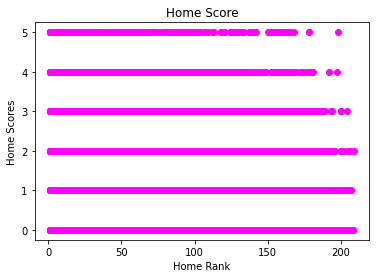

In [ ]:
#plotting a scatter plot to visualize the data
plt.scatter(x, y, color='magenta') 
plt.title('Home Score')
plt.xlabel('Home Rank')
plt.ylabel('Home Scores')
plt.show()

In [ ]:

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 124)

# Standardising values of x_train and x_test using standard scaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

# Training our model
model= LinearRegression()
model.fit(x_train, y_train)

# Making prediction model
y_pred=model.predict(x_test)

In [ ]:
# Creating a  dictionary to hold parameters

params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds

kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=model, param_grid = params, cv = kfold)

# Fitting the grid search 
grid_search_results = grid_search.fit(x, y)

# Displaying the best parameters and the the best score
print(f'The best score is {grid_search.best_score_}')

The best score is 0.03217610282292101


Plotting residual plot

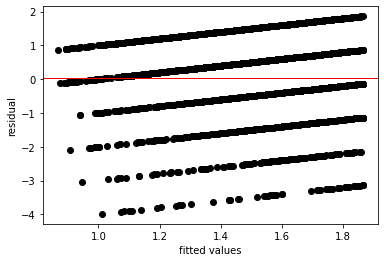

In [ ]:
 #Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Barlett's Test

In [ ]:
import scipy as sp
test, pvalue = sp.stats.bartlett(y_pred, residuals)

In [ ]:
# Calculating the critical value of the chi squared distribution, to compare it with the test_result
freedom_degrees = len(y_pred) - 1
probability =  1 - pvalue
critical_value = sp.stats.chi2.ppf(probability, freedom_degrees)

if (test > critical_value):
  print('The variances are heterogenous')
else:  
  print('The variances are homogeneous')

The variances are homogeneous


# Logistic Regression

In [ ]:
#logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[163 150  68  43  16   9]
 [513 659 535 294 119  53]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [ ]:
params = {'C': [1, 5],
         'penalty': ['l1', 'l2']}

model = LogisticRegression()

# Creating a cross validation of 5 folds
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=model, param_grid = params, cv = kfold)

# Fitting the grid search 
grid_search_results = grid_search.fit(x, y)

# Displaying the best parameters and the the best score
print(f'The best score is {grid_search.best_score_}')

The best score is 0.31868802440884825


In [ ]:
df_new = df[['home_team', 'away_team', 'home_score', 'away_score', 'year', 'hometeam_rank', 'awayteam_rank', 'tourn']]

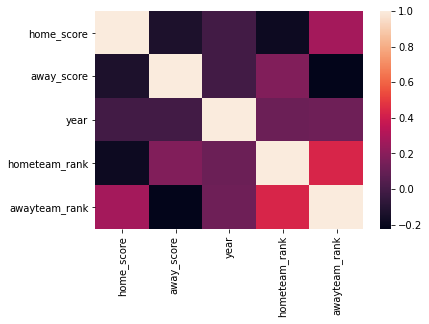

In [ ]:
# Checking for independence between features
# 
sns.heatmap(df_new.corr())